# A Brief Analysis of the 2020 Stack Overflow Developer Survey Data
## Part 4

## 1. Business Understanding
I am conducting analysis on the 2020 Stack Overflow Developer Survey Data to answer the following question:

- What are the most popular programming languages between 2018 and 2020

To get started, let's read in the necessary libraries and the CSV file of the raw data of the survey:

In [76]:
import numpy as np
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
%matplotlib inline

In [77]:
# Reading survey results data from the 2018, 2019 and 2020

df_18 = pd.read_csv('Data/developer_survey_2018/survey_results_public.csv')
df_19 = pd.read_csv('Data/developer_survey_2019/survey_results_public.csv')
df_20 = pd.read_csv('Data/developer_survey_2020/survey_results_public.csv')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [78]:
def split_items(df, ColumnName):

    languages_list = df[df[ColumnName].notnull()]
    unique_languages = {}

    # split the languages on ;
    for language_set in languages_list[ColumnName].apply(lambda row: str(row).split(';')):
        for language in language_set:
            if language not in unique_languages.keys():
                unique_languages[language] = 1
            else:
                unique_languages[language] += 1
                
    return unique_languages    

In [79]:
def plot_df(unique_dim_dict, plot_title):
    """ Function for plotting a horizontal bar graph for the given dimension dictionary
    
    INPUT - unique_dim_dict - dictionary 
            plot_title - string 
    
    OUTPUT - bar chart showing the total count for per dimension of interest
            
    """
    dim_count = pd.DataFrame.from_dict(unique_dim_dict, orient='index', dtype=None)
    dim_count.columns = ['Count']
    dim_count.sort_values('Count',ascending=True,inplace=True)

    dim_count.plot(kind = 'barh', figsize = (12,12), fontsize = 10, title = plot_title);

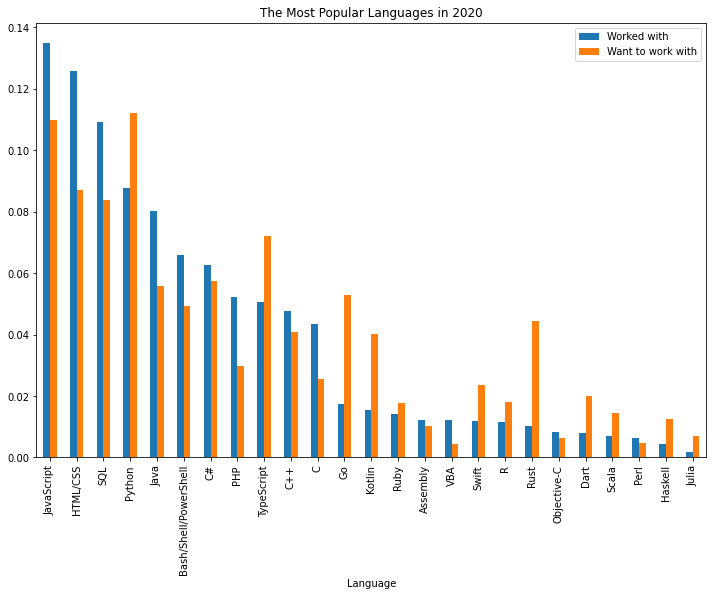

In [80]:
unique_languages_20 = split_items(df_20,'LanguageWorkedWith')
unique_languages_future_20 = split_items(df_20,'LanguageDesireNextYear')
compare_df_20, languages_df_20, languages_df_future_20 = compare_languages(df_20, 'LanguageWorkedWith', 'LanguageDesireNextYear')
plot_df_all(compare_df_20,'The Most Popular Languages in 2020')

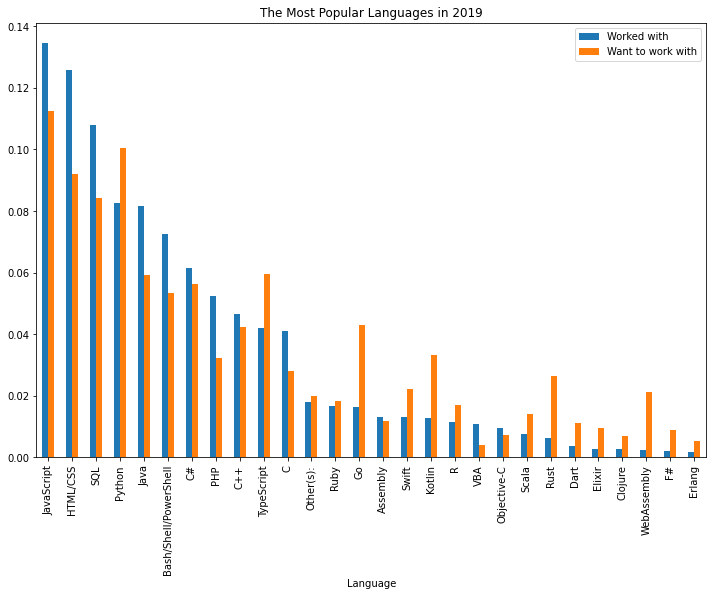

In [81]:
unique_languages_19 = split_items(df_19,'LanguageWorkedWith')
unique_languages_future_19 = split_items(df_19,'LanguageDesireNextYear')
compare_df_19, languages_df_19, languages_df_future_19 = compare_languages(df_19, 'LanguageWorkedWith', 'LanguageDesireNextYear')
plot_df_all(compare_df_19,'The Most Popular Languages in 2019')

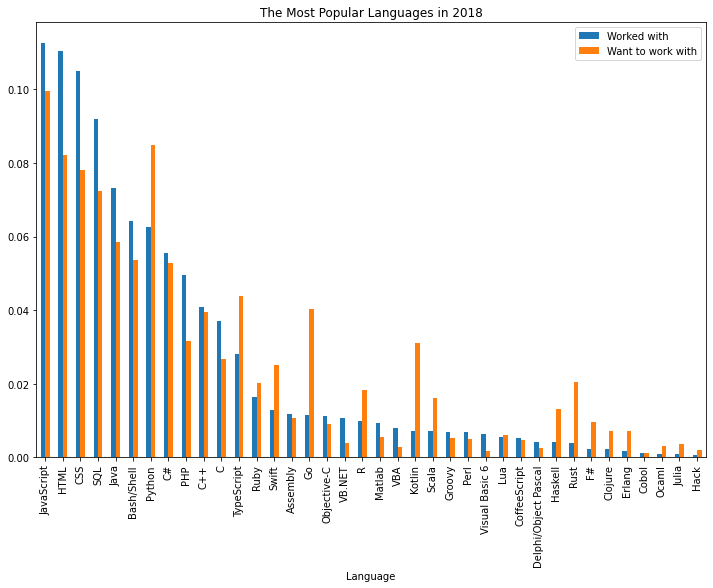

In [82]:
unique_languages_18 = split_items(df_18,'LanguageWorkedWith')
unique_languages_future_18 = split_items(df_18,'LanguageDesireNextYear')
compare_df_18, languages_df_18, languages_df_future_18 = compare_languages(df_18, 'LanguageWorkedWith', 'LanguageDesireNextYear')
plot_df_all(compare_df_18,'The Most Popular Languages in 2018')

In [83]:
def convert_to_DF(unique_languages, columns1):
    
    df = pd.DataFrame(list(unique_languages.items()),columns=columns1) 
    
    return df

In [84]:
unique_languages_df_18 = convert_to_DF(unique_languages_18, ['Language', 'Worked with'])
unique_languages_df_19 = convert_to_DF(unique_languages_19, ['Language', 'Worked with'])
unique_languages_df_20 = convert_to_DF(unique_languages_20, ['Language', 'Worked with'])


In [85]:
unique_languages_future_df_18 = convert_to_DF(unique_languages_future_18, ['Language', 'Want to work with'])
unique_languages_future_df_19 = convert_to_DF(unique_languages_future_19, ['Language', 'Want to work with'])
unique_languages_future_df_20 = convert_to_DF(unique_languages_future_20, ['Language', 'Want to work with'])


In [86]:
unique_languages_df_18_19 = pd.merge(unique_languages_df_18, unique_languages_df_19, on='Language')
unique_languages_df_18_19_20 = pd.merge(unique_languages_df_18_19, unique_languages_df_20, on='Language')
unique_languages_df_18_19_20.set_index('Language', inplace=True)
unique_languages_df_18_19_20.columns = ['2018', '2019', '2020']
unique_languages_df_18_19_20.sort_values(by=['2020'], inplace=True, ascending=False)
unique_languages_df_18_19_20.head()

,2018,2019,2020
Language,,,
JavaScript,54686,59219,38822
SQL,44670,47544,31413
Python,30359,36443,25287
Java,35521,35917,23074
C#,26954,27097,18041


In [87]:
unique_languages_future_df_18_19 = pd.merge(unique_languages_future_df_18, unique_languages_future_df_19, on='Language')
unique_languages_future_df_18_19_20 = pd.merge(unique_languages_future_df_18_19, unique_languages_future_df_20, on='Language')
unique_languages_future_df_18_19_20.set_index('Language', inplace=True)
unique_languages_future_df_18_19_20.columns = ['2018', '2019', '2020']
unique_languages_future_df_18_19_20.sort_values(by=['2020'], inplace=True, ascending=False)
unique_languages_future_df_18_19_20.head()

,2018,2019,2020
Language,,,
Python,32795,40006,26682
JavaScript,38465,44739,26188
SQL,28011,33566,19970
TypeScript,16896,23720,17150
C#,20419,22449,13674


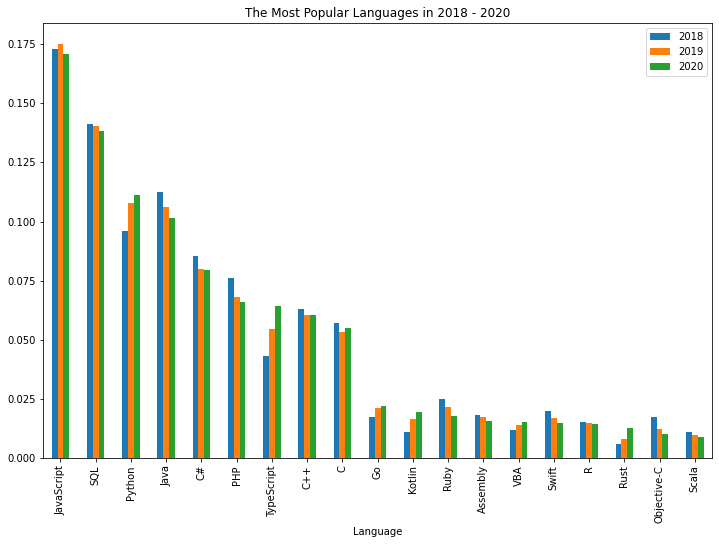

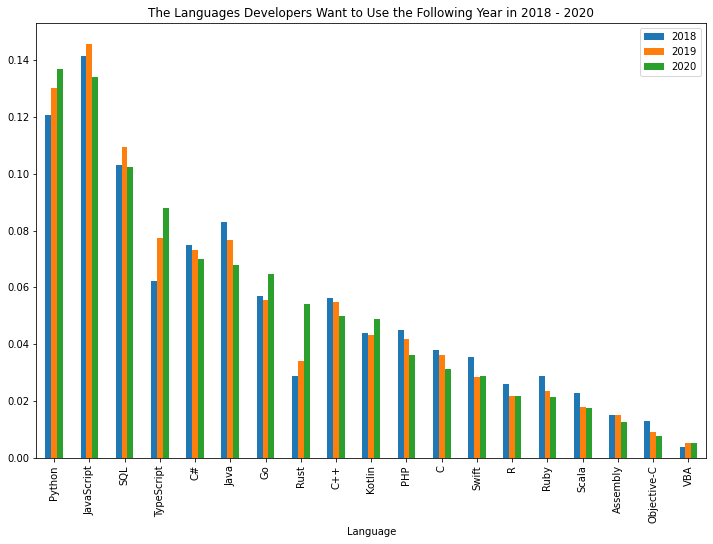

In [92]:
plot_df_all(unique_languages_df_18_19_20,'The Most Popular Languages in 2018 - 2020')
plot_df_all(unique_languages_future_df_18_19_20,'The Languages Developers Want to Use the Following Year in 2018 - 2020')

In [89]:
def plot_df_all(df,plot_title):
    '''Plot df'''
    (df/df.sum()).plot(kind='bar', title=plot_title, figsize=(12,8))

    return 

In [90]:
def compare_languages(df, CurrentLanguages, FutureLanguages):
    '''compare '''
    # List all the programming languages developeres worked with this year
    unique_languages = split_items(df, CurrentLanguages)
    
    # List all the programming languages developeres want to work with in the future
    unique_future_languages = split_items(df, FutureLanguages)

    # Craete a dataframe of the languages 
    columns1 = ['Language', 'Worked with']
    languages_df = pd.DataFrame(list(unique_languages.items()),columns=columns1) 

    columns2 = ['Language', 'Want to work with']
    languages_df_future = pd.DataFrame(list(unique_future_languages.items()),columns=columns2) 
    
    compare_df = pd.merge(languages_df, languages_df_future, on='Language')
    compare_df.sort_values(by=['Worked with'], inplace=True, ascending=False)
    compare_df.set_index('Language', inplace=True)

    #compare_df.columns = ['Language', 'worked with', 'want to work with']
   
    return compare_df, languages_df, languages_df_future